# Práctica 2 - Lingüística computacional

## Procesamiento del corpus *cess_esp*

### Carga del corpus

In [145]:
import nltk     
# nltk.download("cess_esp")

In [146]:
from nltk.corpus import cess_esp
corpus_sentences=cess_esp.tagged_sents()
number_sentences=len(corpus_sentences)
print ('number sentences:',number_sentences)
print ('number words:',end=" ")
nw=0
for s in range (len(corpus_sentences)):
   nw=nw+len(corpus_sentences[s])
print (nw)
print (corpus_sentences[0:2])

number sentences: 6030
number words: 192686
[[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')], [('Una', 'di0fs0'), ('portavoz', 'nccs000'), ('de', 'sps00'), ('EDF', 'np00000'), ('explicó', 'vmis3s0'), ('

#### Pasar el corpus a un fichero 

In [147]:
outfile = open('corpus.txt', 'w') 
for s in (corpus_sentences):
    str=''
    for x in s:
        str=str+('/'.join(x)+' ')
    #print (str)    
    outfile.write(str+'\n')
outfile.close()

#### Guardar corpus en una lista

In [148]:
infile = open('corpus.txt', 'r')
corpus=[]
for line in infile:
    corpus.append(line.strip('\n'))
infile.close()
print (corpus[0:2])

['El/da0ms0 grupo/ncms000 estatal/aq0cs0 Electricité_de_France/np00000 -Fpa-/Fpa EDF/np00000 -Fpt-/Fpt anunció/vmis3s0 hoy/rg ,/Fc jueves/W ,/Fc la/da0fs0 compra/ncfs000 del/spcms 51_por_ciento/Zp de/sps00 la/da0fs0 empresa/ncfs000 mexicana/aq0fs0 Electricidad_Águila_de_Altamira/np00000 -Fpa-/Fpa EAA/np00000 -Fpt-/Fpt ,/Fc creada/aq0fsp por/sps00 el/da0ms0 japonés/aq0ms0 Mitsubishi_Corporation/np00000 para/sps00 poner_en_marcha/vmn0000 una/di0fs0 central/ncfs000 de/sps00 gas/ncms000 de/sps00 495/Z megavatios/ncmp000 ./Fp ', 'Una/di0fs0 portavoz/nccs000 de/sps00 EDF/np00000 explicó/vmis3s0 a/sps00 EFE/np00000 que/cs el/da0ms0 proyecto/ncms000 para/sps00 la/da0fs0 construcción/ncfs000 de/sps00 Altamira_2/np00000 ,/Fc al/spcms norte/ncms000 de/sps00 Tampico/np00000 ,/Fc prevé/vmm02s0 la/da0fs0 utilización/ncfs000 de/sps00 gas/ncms000 natural/aq0cs0 como/cs combustible/ncms000 principal/aq0cs0 en/sps00 una/di0fs0 central/ncfs000 de/sps00 ciclo/ncms000 combinado/aq0msp que/pr0cn000 debe/vmi

### Reducción de etiquetas

In [149]:
new_corpus = []
for line in corpus:
    new_line = []
    for el in line.split():
        w = el[:el.find("/")] # palabra
        if w == "*0*" or w == "sn": # eliminar anotaciones "*0*" y "sn"
            continue
        c = el[el.find("/")+1:] # categoria
        if c[0] == 'v' or c[0] == 'F':
            c = c[:3] # se hacen de longitud 3
        else:
            c = c[:2] # se hacen de longitud 2
        new_line.append((w,c))
    new_corpus.append(new_line)
print (new_corpus[0:2])

[[('El', 'da'), ('grupo', 'nc'), ('estatal', 'aq'), ('Electricité_de_France', 'np'), ('-Fpa-', 'Fpa'), ('EDF', 'np'), ('-Fpt-', 'Fpt'), ('anunció', 'vmi'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da'), ('compra', 'nc'), ('del', 'sp'), ('51_por_ciento', 'Zp'), ('de', 'sp'), ('la', 'da'), ('empresa', 'nc'), ('mexicana', 'aq'), ('Electricidad_Águila_de_Altamira', 'np'), ('-Fpa-', 'Fpa'), ('EAA', 'np'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq'), ('por', 'sp'), ('el', 'da'), ('japonés', 'aq'), ('Mitsubishi_Corporation', 'np'), ('para', 'sp'), ('poner_en_marcha', 'vmn'), ('una', 'di'), ('central', 'nc'), ('de', 'sp'), ('gas', 'nc'), ('de', 'sp'), ('495', 'Z'), ('megavatios', 'nc'), ('.', 'Fp')], [('Una', 'di'), ('portavoz', 'nc'), ('de', 'sp'), ('EDF', 'np'), ('explicó', 'vmi'), ('a', 'sp'), ('EFE', 'np'), ('que', 'cs'), ('el', 'da'), ('proyecto', 'nc'), ('para', 'sp'), ('la', 'da'), ('construcción', 'nc'), ('de', 'sp'), ('Altamira_2', 'np'), (',', 'Fc'), ('al

### División del corpus en *training* (90%) y *test* (10%)

In [150]:
s_train = new_corpus[:int(len(new_corpus)*0.9)]
s_test = new_corpus[int(len(new_corpus)*0.9):]

print(len(s_train))
print(len(s_test))
print(s_test)

5427
603
[[('Y', 'cc'), ('al_final', 'rg'), ('le', 'pp'), ('pedía', 'vmi'), ('que', 'cs'), ('colabore', 'vms'), ('conmigo', 'pp'), ('en', 'sp'), ('la', 'da'), ('campaña', 'nc'), ('electoral', 'aq'), ('vasca', 'aq'), ('-', 'Fg'), ('.', 'Fp')], [('Jáuregui', 'np'), ('entiende', 'vmi'), ('que', 'cs'), ('Corcuera', 'np'), ('tiene', 'vmi'), ('motivos', 'nc'), ('para', 'sp'), ('estar', 'vmn'), ('deprimido', 'aq'), (':', 'Fd'), ('-', 'Fg'), ('A', 'sp'), ('finales', 'nc'), ('del', 'sp'), ('93', 'W'), ('estaba', 'vmi'), ('en', 'sp'), ('la', 'da'), ('cresta', 'nc'), ('de', 'sp'), ('la', 'da'), ('ola', 'nc'), (',', 'Fc'), ('muy', 'rg'), ('feliz', 'aq'), ('incluso', 'rg'), ('por', 'sp'), ('su', 'dp'), ('dimisión', 'nc'), ('.', 'Fp')], [('Dejaba', 'vmi'), ('cinco', 'dn'), ('años', 'nc'), ('de', 'sp'), ('gestión', 'nc'), ('espléndida', 'aq'), ('y', 'cc'), ('se', 'p0'), ('llevaba', 'vmi'), ('la', 'da'), ('sensación', 'nc'), ('de', 'sp'), ('que', 'cs'), ('había', 'vai'), ('superado', 'vmp'), ('pruebas

## Uso de etiquetadores morfosintácticos

In [151]:
from nltk.tag import hmm, tnt
from nltk import AffixTagger as af

### HMM

#### Entrenamiento con el *train*

In [152]:
tagger_hmm = hmm.HiddenMarkovModelTagger.train(s_train)

#### Etiquetado del *test* (prueba para una frase)

In [153]:
words = [w for w,_ in s_test[0]]
print(words)
pred = tagger_hmm.tag(words)
for w,c in pred:
    print("%s | %s" %(w,c))

['Y', 'al_final', 'le', 'pedía', 'que', 'colabore', 'conmigo', 'en', 'la', 'campaña', 'electoral', 'vasca', '-', '.']
Y | cc
al_final | rg
le | pp
pedía | vmi
que | cs
colabore | vai
conmigo | vmp
en | sp
la | da
campaña | nc
electoral | aq
vasca | aq
- | Fg
. | Fp


#### Evaluar prestaciones

In [154]:
hmm_s = tagger_hmm.accuracy(s_test)

### TnT

#### Entrenamiento con el *train*

In [155]:
# TnT NO gestiona palabras no vistas
# mejorara si se usa un tagger previo
tagger_af = af(s_train) # Affix tagger 
tagger_tnt = tnt.TnT(tagger_af, True)
tagger_tnt.train(s_train)

#### Etiquetado del *test* (prueba para una frase)

In [156]:
words = [w for w,_ in s_test[0]]
print(words)
pred = tagger_tnt.tag(words)
for w,c in pred:
    print("%s | %s" %(w,c))

['Y', 'al_final', 'le', 'pedía', 'que', 'colabore', 'conmigo', 'en', 'la', 'campaña', 'electoral', 'vasca', '-', '.']
Y | cc
al_final | rg
le | pp
pedía | vmi
que | cs
colabore | np
conmigo | nc
en | sp
la | da
campaña | nc
electoral | aq
vasca | aq
- | Fg
. | Fp


#### Evaluar prestaciones

In [157]:
tnt_s = tagger_tnt.accuracy(s_test)

## Evaluación usando todo el corpus

#### Función cross-validation para HMM

In [158]:
def cross_validation_hmm(particiones, k, tagger):
    precisions = []
    for i in range(k):
        test = particiones[i]
        train = []
        for j in range(k):
            if j != i:
                train += particiones[j]
        tg = tagger.train(train)
        precisions.append(tg.evaluate(test))
    return precisions # precision media

### Datos sin barajar

#### Creación de las particiones

In [159]:
k = 10 # numero de particiones
n = int(len(new_corpus)/k) # tamanyo de cada particion
particiones = [new_corpus[i:i+n] for i in range(0, len(new_corpus), n)] # lista de particiones

#### Evaluación de los modelos

- HMM

In [160]:
tagger_hmm = hmm.HiddenMarkovModelTagger
hmm_no_bar = cross_validation_hmm(particiones, k, tagger_hmm)
print(hmm_no_bar)

C:\Users\Aitam\AppData\Local\Temp\ipykernel_2828\1331273383.py:10: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  precisions.append(tg.evaluate(test))


[0.9284508043729446, 0.9236658512276887, 0.9227862008349813, 0.9251021133013674, 0.9228190879421364, 0.8783124588002637, 0.8881034848377748, 0.8913107511045656, 0.8911650954798163, 0.8784427571832664]


[0.9284508043729446, 0.9236658512276887, 0.9227862008349813, 0.9251021133013674, 0.9228190879421364, 0.8783124588002637, 0.8881034848377748, 0.8913107511045656, 0.8911650954798163, 0.8784427571832664]

- TnT

In [161]:
precisions = []
for i in range(k):
    test = particiones[i]
    train = []
    for j in range(k):
        if j != i:
            train += particiones[j]
    tagger_af = af(train) # Affix tagger 
    tagger_tnt = tnt.TnT(tagger_af, True)
    tagger_tnt.train(train)
    precisions.append(tagger_tnt.evaluate(test))

tnt_no_bar = precisions
print(tnt_no_bar)

C:\Users\Aitam\AppData\Local\Temp\ipykernel_2828\2622861897.py:11: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  precisions.append(tagger_tnt.evaluate(test))


[0.9384054750688827, 0.9348101839267917, 0.9315754779169413, 0.9350914580003552, 0.9352121372497133, 0.9155570204350693, 0.9235880398671097, 0.9303681885125185, 0.9246434614454919, 0.9136519279440226]


[0.9384054750688827, 0.9348101839267917, 0.9315754779169413, 0.9350914580003552, 0.9352121372497133, 0.9155570204350693, 0.9235880398671097, 0.9303681885125185, 0.9246434614454919, 0.9136519279440226]

### Datos barajados

In [162]:
from random import shuffle
datos_barajados = shuffle(new_corpus)

#### Creación de las particiones

In [163]:
k = 10 # numero de particiones
n = int(len(new_corpus)/k) # tamanyo de cada particion
particiones = [new_corpus[i:i+n] for i in range(0, len(new_corpus), n)] # lista de particiones

#### Evaluación de los modelos

- HMM

In [164]:
tagger_hmm = hmm.HiddenMarkovModelTagger
hmm_bar = cross_validation_hmm(particiones, k, tagger_hmm)
print(hmm_bar)

C:\Users\Aitam\AppData\Local\Temp\ipykernel_2828\1331273383.py:10: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  precisions.append(tg.evaluate(test))


[0.9248589088954582, 0.9266374623951021, 0.9243453980296086, 0.9295825771324864, 0.9280800821355236, 0.9270756988796984, 0.9236678126342931, 0.9234056021522393, 0.9260838663823738, 0.9280435837963212]


- TnT

In [165]:
precisions = []
for i in range(k):
    test = particiones[i]
    train = []
    for j in range(k):
        if j != i:
            train += particiones[j]
    tagger_af = af(train) # Affix tagger 
    tagger_tnt = tnt.TnT(tagger_af, True)
    tagger_tnt.train(train)
    precisions.append(tagger_tnt.evaluate(test))

tnt_bar = precisions
print(tnt_bar)

C:\Users\Aitam\AppData\Local\Temp\ipykernel_2828\810302812.py:11: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  precisions.append(tagger_tnt.evaluate(test))


[0.9463585057780166, 0.946798965535441, 0.9481060007375797, 0.9505315011667099, 0.9482546201232033, 0.9469165532404984, 0.945745595186936, 0.9468270295932901, 0.9480618883603958, 0.9453584335724688]


[0.901281775096941, 
0.898677276015294, 
0.8988532473709243, 
0.902455879226026, 
0.9010506932409013, 
0.9025041379678573, 
0.8954843408594318, 
0.9038865277279943, 
0.9056800131456427, 
0.9016627078384798]

## Resultados

In [166]:
import math
import matplotlib.pyplot as plt

### Un solo experimento

IC = $P \pm 1.96 \sqrt{\frac{P(1-P)}{N}}$

- HMM

In [167]:
print("P = %f" %(hmm_s))
err = 1.96 * math.sqrt((hmm_s * (1-hmm_s))/len(s_test))
res_hmm_s ="[%f, %f]" %(hmm_s - err, hmm_s + err)

P = 0.878443


- TnT

In [168]:
print("P = %f" %(tnt_s))
err = 1.96 * math.sqrt((tnt_s * (1-tnt_s))/len(s_test))
res_tnt_s = "[%f, %f]" %(tnt_s - err, tnt_s + err)

P = 0.913652


### Ten-fold cross-validation

IC = $\overline{P} \pm 1.96 \sqrt{\frac{s^{2}}{10}}$

In [169]:
def scuadrado(precisiones):
    media = sum(precisiones)/len(precisiones)
    sc = sum([(prec - media)**2 for prec in precisiones]) / len(precisiones)
    return sc

In [170]:
def ic95(p,n):
    return 1.96 * math.sqrt((p*(1-p)) / n)

- HMM (no barajado)

In [171]:
pm_hmm_no_bar = sum(hmm_no_bar)/len(hmm_no_bar)
print("P med. = %f" %(pm_hmm_no_bar))
sc = scuadrado(hmm_no_bar)
err = 1.96 * math.sqrt(sc/k)
res_hmm_no_bar = "[%f, %f]" %(pm_hmm_no_bar - err, pm_hmm_no_bar + err)

P med. = 0.905016


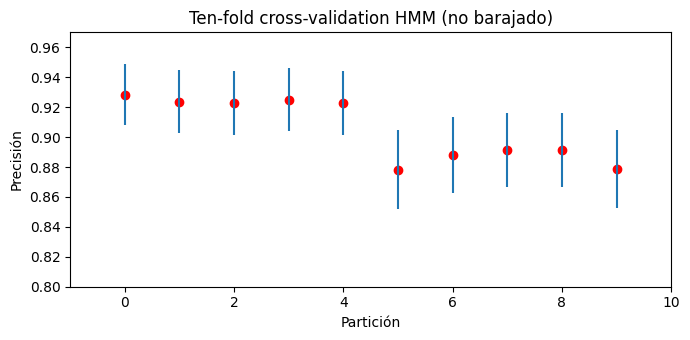

In [172]:
x=[i for i in range(10)]
y=hmm_no_bar
plt.axis([-1, 10, 0.80, 0.97])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('Ten-fold cross-validation HMM (no barajado)')
plt.plot(x,y,'ro')
e=[ic95(p,n) for p in hmm_no_bar] # n es el tamanyo de cada particion
plt.errorbar(x,y,yerr=e,linestyle='None')
plt.show()

- HMM (barajado)

In [173]:
pm_hmm_bar = sum(hmm_bar)/len(hmm_bar)
print("P med. = %f" %(pm_hmm_bar))
sc = scuadrado(hmm_bar)
err = 1.96 * math.sqrt(sc/k)
res_hmm_bar = "[%f, %f]" %(pm_hmm_bar - err, pm_hmm_bar + err)

P med. = 0.926178


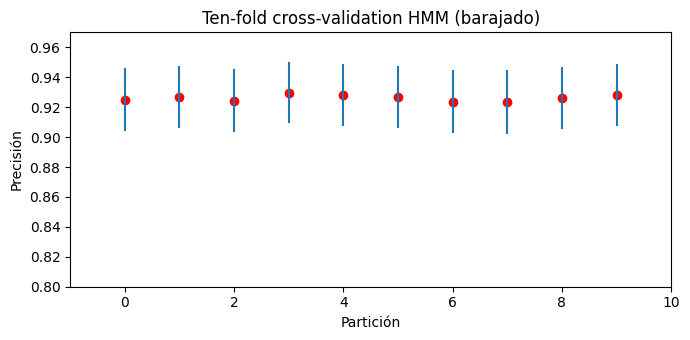

In [174]:
x=[i for i in range(10)]
y=hmm_bar
plt.axis([-1, 10, 0.80, 0.97])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('Ten-fold cross-validation HMM (barajado)')
plt.plot(x,y,'ro')
e=[ic95(p,n) for p in hmm_bar]# Lista con los intervalos de confianza
plt.errorbar(x,y,yerr=e,linestyle='None')
plt.show()

- TnT (no bajarado)

In [175]:
pm_tnt_no_bar = sum(tnt_no_bar)/len(tnt_no_bar)
print("P med. = %f" %(pm_tnt_no_bar))
sc = scuadrado(tnt_no_bar)
err = 1.96 * math.sqrt(sc/k)
res_tnt_no_bar = "[%f, %f]" %(pm_tnt_no_bar - err, pm_tnt_no_bar + err)

P med. = 0.928290


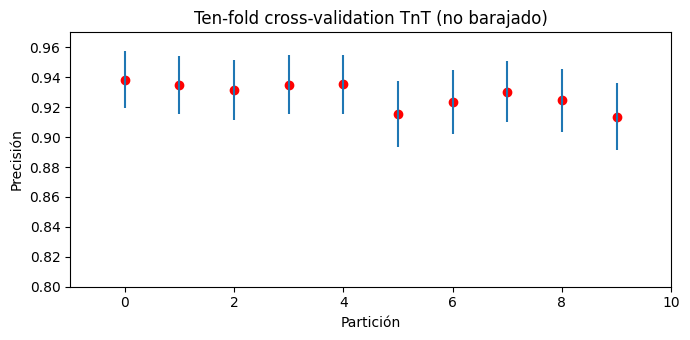

In [176]:
x=[i for i in range(10)]
y=tnt_no_bar
plt.axis([-1, 10, 0.80, 0.97])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('Ten-fold cross-validation TnT (no barajado)')
plt.plot(x,y,'ro')
e=[ic95(p,n) for p in tnt_no_bar]# Lista con los intervalos de confianza
plt.errorbar(x,y,yerr=e,linestyle='None')
plt.show()

- TnT (barajado)

In [177]:
pm_tnt_bar = sum(tnt_bar)/len(tnt_bar)
print("P med. = %f" %(pm_tnt_bar))
sc = scuadrado(tnt_bar)
err = 1.96 * math.sqrt(sc/k)
res_tnt_bar = "[%f, %f]" %(pm_tnt_bar - err, pm_tnt_bar + err)

P med. = 0.947296


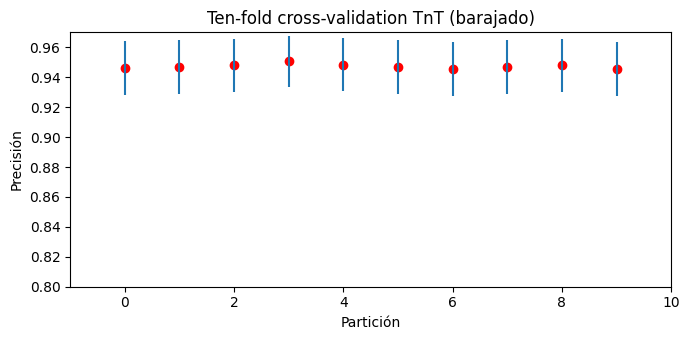

In [178]:
x=[i for i in range(10)]
y=tnt_bar
plt.axis([-1, 10, 0.80, 0.97])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('Ten-fold cross-validation TnT (barajado)')
plt.plot(x,y,'ro')
e=[ic95(p,n) for p in tnt_bar]# Lista con los intervalos de confianza
plt.errorbar(x,y,yerr=e,linestyle='None')
plt.show()

### Resumen

In [180]:
import numpy as np

print("--- I.C ---|    UN EXPERIMENTO    |       10-FOLD        |    10-fold shuffle   |")
print("    HMM    | " + res_hmm_s + " | " +res_hmm_no_bar + " | " + res_hmm_bar + " |")
print("    TnT    | " + res_tnt_s + " | " +res_tnt_no_bar + " | " + res_tnt_bar + " |")

--- I.C ---|    UN EXPERIMENTO    |       10-FOLD        |    10-fold shuffle   |
    HMM    | [0.852361, 0.904525] | [0.892592, 0.917440] | [0.924957, 0.927399] |
    TnT    | [0.891233, 0.936071] | [0.923232, 0.933348] | [0.946413, 0.948179] |


### Conclusiones
Para HMM, entre realizar el entrenamiento con un solo experimento o con *10-fold cross-validation* (sin shuffle), a pesar de que la precisión media sea mejor en el segundo caso, no se puede afirmar que el comportamiento sea mejor en uno que en otro, ya que sus intervalos de confianza se solapan. Lo mismo ocurre si se comparan estas dos formas de entrenamiento para TnT. Sin embargo, en ambos casos se ve una mejoría con el entrenamiento *10-fold cross-validation* (shuffle). Entre estas dos últimas opciones, la que mejores resultados da es la de TnT.

\* al TnT tagger se le ha pasado un *Affix Tagger* en el entrenamiento para que pudiera gestionar las palabras no vistas, así su funcionamiento mejora. 